# GEOG 5160 6160 Lab 01

This lab provides a brief overview of using pandas and Python for data manipulation. Some examples and the introduction are modified from https://ourcodingclub.github.io

`pandas` is a hugely popular, and still growing, Python library used across a range of disciplines from environmental and climate science, through to social science, linguistics, biology, as well as a number of applications in industry such as data analytics, financial trading, and many others. 

`pandas` is designed to help you deal with a whole set of tasks necessary for data analysis and maipulation. It simplifies the loading of data from external sources such as text files and databases, as well as providing ways of analysing and manipulating data once it is loaded into your computer. The features provided in `pandas` automate and simplify a lot of the common tasks that would take many lines of code to write in the basic Python language. 

If you have used R’s dataframes before, or the `numpy` package in Python, you may find some similarities in the Python `pandas` package. But if not, don’t worry because this tutorial doesn’t assume any knowledge of NumPy or R, only basic-level Python.

To use `pandas` functions, you will first need to `import` the package using the following code. By convention, the `pandas` module is almost always imported `as pd`. Every time we use a pandas feature thereafter, we can shorten what we type by just typing `pd`, such as `pd.some_function()`.

In [1]:
import pandas as pd

## pandas data type

### Series

A series is a one-dimensional array-like structure designed to hold a single vector of data and an associated index. You can easily create a series using the `pd.Series()` function and a Python list. Here we use a set of numbers:

In [2]:
my_series = pd.Series([4.6, 2.1, -4.0, 3.0])
print(my_series)

0    4.6
1    2.1
2   -4.0
3    3.0
dtype: float64


Note the list of numbers, organized into a single column on the right, and the index on the left (0 - 3). Note that Python is zero-indexed, i.e. indicies start at 0, not 1. If you just want the values, not the index:

In [3]:
print(my_series.values)

[ 4.6  2.1 -4.   3. ]


### Data frames

DataFrames represent tabular data, a bit like a spreadsheet. These are organized into columns (each of which is a Series), which generally represent variables or features, and rows, which generally represent observations. Each column can store a single data-type, e.g. floating point numbers, strings, boolean values etc. DataFrames can be indexed by either their row or column names. (They are similar in many ways to R’s data.frame.)

DataFrames can be created from a Python dictionary, or by loading in a text file containing tabular data.

#### Dictionaries

Dictionaries are Python structures that contain a set of `key:value` pairs of information. In the most basic form, a single value is used to index a single key. In DataFrames, however, we can index a list with multiple values to a single key. The key is then used to create the column heading in a DataFrame, and the list represents the set of values (one per observation). The following first creates a dictionary with some basic information about a set of Scottish hills, then uses `pd.DataFrame` to convert this to a DataFrame:

In [4]:
scottish_hills = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}
dataframe = pd.DataFrame(scottish_hills)
print(dataframe)

               Hill Name  Height   Latitude  Longitude
0              Ben Nevis    1345  56.796850  -5.003508
1             Ben Macdui    1309  57.070453  -3.668262
2              Braeriach    1296  57.078628  -3.728024
3             Cairn Toul    1291  57.054611  -3.710420
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416


Note how the dictionary keys have become column headers running along the top, and as with the Series, an index number has been automatically generated. The columns are also in the order we specified.

In [5]:
#### Reading from files

`pandas` has a built function (`pd.read_csv()`) that allows you to read in comma seperated value (CSV) files. An alternative is to use Python's built in `CSV` library. Here, we'll read in the Penguin dataset, and use this to create a new DataFrame called `penguins`:

In [6]:
penguins = pd.read_csv("../datafiles/penguins.csv")

DataFrames have a set of attributes and methods that can be used to find out basic information about them. For example, `shape` returns the dimensions of the data (here, 344 rows and 8 columns):

In [7]:
penguins.shape

(344, 8)

Use `head(6)` to get the first six lines (changing the `6` will show more or fewer lines):

In [8]:
penguins.head(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


And you can use `tail()` to see the last few rows

In [9]:
penguins.tail(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


If you want to just see the column names:

In [10]:
penguins.columns.values

array(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'], dtype=object)

Use `describe()` to get summary statistics on the columns (numeric only):

In [11]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Accessing values

You can access individual series in the DataFrame using the column name:

In [12]:
penguins['flipper_length_mm']

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 344, dtype: float64

Note that the 4th observation has a missing value marked by `NaN`. The pandas function `dropna()` allows us to remove all observations with missing values. Here, we create a new DataFrame, the extract the flipper length values again. Note that the length (shown at the bottom) has decreased. 

In [13]:
penguins2 = penguins.dropna()
penguins2['flipper_length_mm']

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 333, dtype: float64

You can also access individual Series using a `.` notation. 

In [14]:
penguins.flipper_length_mm

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 344, dtype: float64

You can also access values in a pandas DataFrame using a row, column index. The format for this is `dataframe.iloc[row]` or `dataframe.iloc[row, col]`. The `iloc` is important here - it tells pandas that you are using integer indices to access the data. To access the first row, simply enter

In [15]:
penguins.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

To access the first value of the first row

In [16]:
penguins.iloc[0,0]

'Adelie'

An equivalent approach would be to extract the first Series (the `species` column) and get the first value

In [17]:
penguins.species.iloc[0]

'Adelie'

If you want to access a range of rows and/or columns, you can use a colon to indicate the start and end of the range you want. To extract the first 3 rows of our DataFrame (note that the end of the range is the row after the range we want):

In [18]:
penguins.iloc[0:3]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


You can do the same to extract a range of columns. Here, we'll extract the 4 to 6th row (`3:6`),and the 3rd to 6th column (`2:6`):

In [19]:
penguins.iloc[3:6, 2:6]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


To add a new column to a DataFrame, simply specify the new Series name within `[]` and provide the vector of values. For example, to include an observation index starting at 1:

In [59]:
penguins['id'] = range(1,345)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,4
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,5


Unwanted columns can be removed using `drop()`:

In [34]:
penguins = penguins.drop('id', axis = 1)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Conditional selection

You can use the values in any of the DataFrame series to conditionally filter parts of the dataset. For example, if we want to find all the rows corresponding to female penguins:

In [44]:
penguins.sex == 'female'

0       True
1      False
2      False
3      False
4      False
       ...  
339     True
340    False
341     True
342     True
343    False
Name: sex, Length: 344, dtype: bool

This returns a Boolean Series, with all 'female' rows marked as `True`. If we incorporate this as an index, then this will only return the rows that meet the condition (i.e. are `True`):

In [45]:
penguins[penguins.sex == 'female']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007
...,...,...,...,...,...,...,...,...
334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009


And we can easily use this to create a new DataFrame with only the female penguin data.

In [46]:
females = penguins[penguins['sex'] == 'female']
females.shape

(165, 8)

You can also use conditional selection with numeric values. Here, we'll create a subset of all penguins weighing over 5kg:

In [21]:
bigbirds = penguins[penguins['body_mass_g'] > 5000]
bigbirds.shape

(61, 8)

You can include multiple conditions by including one of the usual set of operators ('AND' = `&`, 'OR' = `|`, 'NOT = `!`). In this example, we extract all Adelie penguins from Biscoe Island:

In [22]:
adelie_biscoe = penguins[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Biscoe')]
adelie_biscoe.shape

(44, 8)

## Split, apply, combine

pandas DataFrames include a useful method `groupby()`. This allows you to form subgroups of the data and run some functions on each one without having to create a new DataFrame for each subgroup. This is called split, apply, combine as we need to do three steps:

- split involves breaking up a data frame into groups
- apply involves runningsome function for each group
- combine merges the results into a new table

To demonstrate this, we'll caclulate the mean body mass of female and male penguins. To start, we'll just calculate the mean for the whole dataset. We can do this by simply calling the `mean()` method on the Series:

In [47]:
penguins.body_mass_g.mean()

4201.754385964912

Now let's group the penguins by `sex`:

In [27]:
penguins.groupby('sex')

This creates a `groupby` index. To actually calculate the mean weight, we can simply append the `mean()` method to this:

In [48]:
penguins.groupby('sex').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,
female,42.096970,16.425455,197.363636,3862.272727,2008.042424
male,45.854762,17.891071,204.505952,4545.684524,2008.041667


As we didn't specify which data Series we wanted the mean for, Python has calculated this for all numeric Series. To only get the body mass values, simply include this following the `groupby()` method:

In [50]:
penguins.groupby('sex').body_mass_g.mean()

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

The `groupby()` method also works with two (or more) groups. Simply specify each group name between `[]`. To get the mean body mass for each species on each island:

In [54]:
penguins.groupby(['species', 'island'])['body_mass_g'].mean()

species    island   
Adelie     Biscoe       3709.659091
           Dream        3688.392857
           Torgersen    3706.372549
Chinstrap  Dream        3733.088235
Gentoo     Biscoe       5076.016260
Name: body_mass_g, dtype: float64

For two groups, pandas DataFrames have a `pivot_table()` method that allow you to make a better formatted version of this table. By default, this will calculate the mean of the variable for each combination of the `index` and `columns`):

In [55]:
penguins.pivot_table('body_mass_g', index = 'sex', columns = 'species')

species,Adelie,Chinstrap,Gentoo
sex,,,
female,3368.835616,3527.205882,4679.741379
male,4043.493151,3938.970588,5484.836066


## Plotting

- Index plots
- Histograms
- Scatter plots
- Boxplots

    

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
plt.style.use('classic')

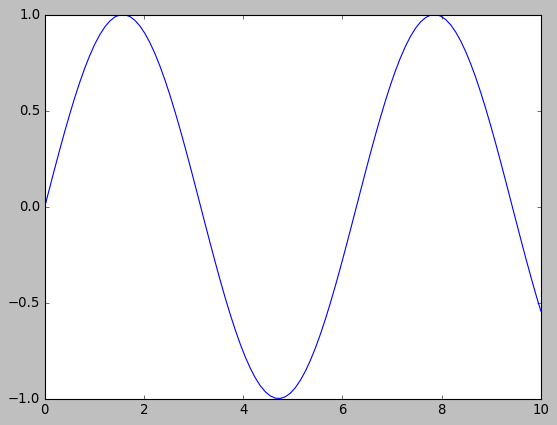

In [37]:
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

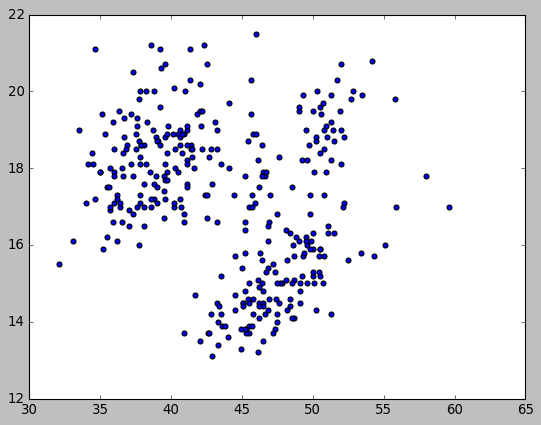

In [38]:
plt.scatter(x = penguins['bill_length_mm'], y = penguins['bill_depth_mm'])

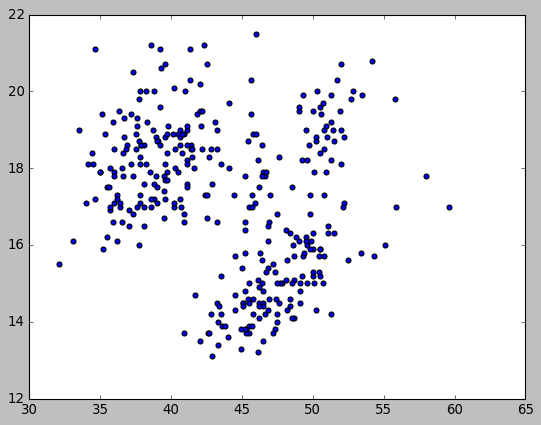

In [39]:
x = penguins['bill_length_mm']
y = penguins['bill_depth_mm']
plt.scatter(x, y)

Text(0.5, 1.0, 'Bill length vs bill depth')

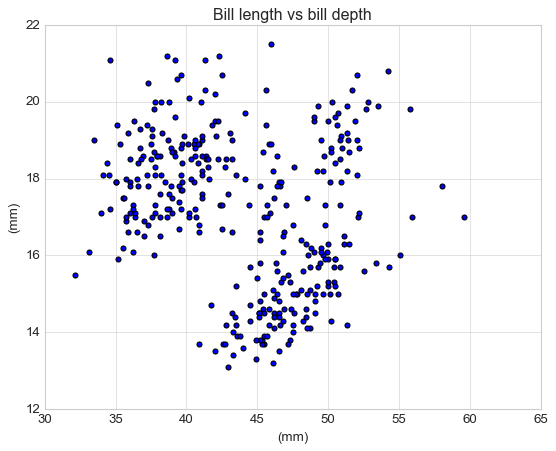

In [40]:
plt.style.use('seaborn-whitegrid')
plt.scatter(x, y)
plt.xlabel("(mm)")
plt.ylabel("(mm)")
plt.title("Bill length vs bill depth")

Text(0.5, 1.0, 'Histogram of bill length')

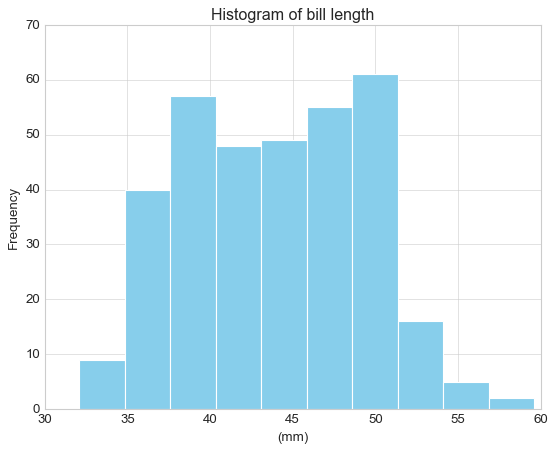

In [41]:
plt.hist(x, color = "skyblue", ec="white")
plt.xlabel("(mm)")
plt.ylabel("Frequency")
plt.title("Histogram of bill length")

Seaborn

In [42]:
import seaborn as sns
sns.set()